# Part 2 of 2 Import libraries and latest project data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
path = r'/Users/melaniehouston/Library/CloudStorage/OneDrive-Personal/Career Foundry/ 04 2024 Instacart Basket Analysis'

In [7]:
path

'/Users/melaniehouston/Library/CloudStorage/OneDrive-Personal/Career Foundry/ 04 2024 Instacart Basket Analysis'

In [8]:
#Import dataframe from Prepared Data from 4.9 Task 1
Instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

# Create a histogram of the “order_hour_of_day” column

In [9]:
#Take a look at the first 5 rows
Instacart.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,orders_time_of_day,...,First_name,Surname,Gender,State,Age,Date_joined,Num_deps,Marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both


<Axes: ylabel='Frequency'>

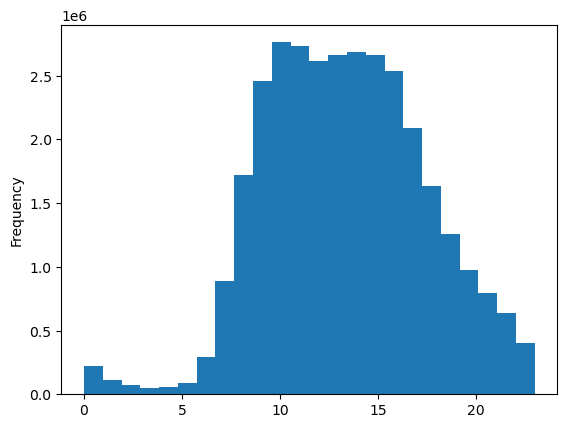

In [11]:
#creating histogram using bins = 24 as there's 24 hrs in a day
Instacart['orders_time_of_day'].plot.hist(bins = 24)

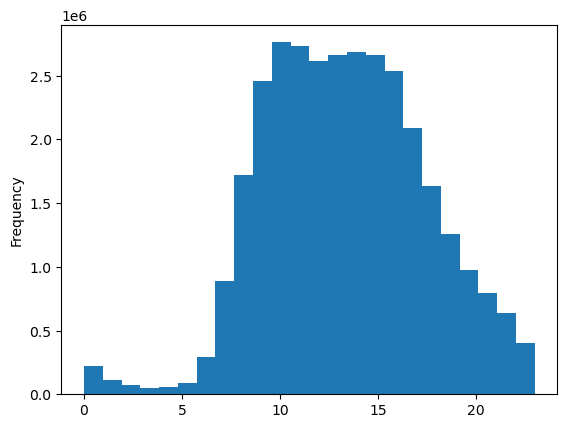

In [15]:
hist2 = Instacart['orders_time_of_day'].plot.hist(bins = 24)

The histogram shows Instacart is receiving orders 24 hours a day with it's busiest hours around 10am to 4pm.

# Creating a bar chart from the “loyalty_flag” column

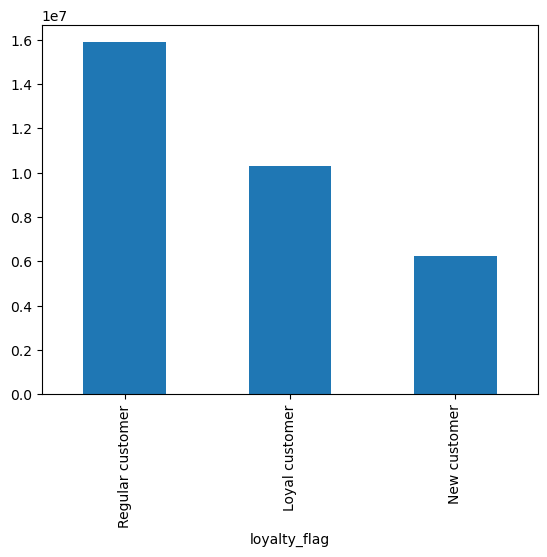

In [14]:
bar2 = Instacart['loyalty_flag'].value_counts().plot.bar()

# Check whether there’s a difference in expenditure depending on the hour of the day

In [16]:
#create a list holding true false values
np.random.seed(4)
dev = np.random.rand(len(Instacart)) <= 0.7

In [17]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [18]:
#store 70% of the sample in the df big
big = Instacart[dev]

In [19]:
#store 30% of the sample in the df small
small = Instacart[~dev]

In [21]:
len(Instacart)

32404859

In [22]:
len(big) + len(small)

32404859

In [23]:
#use sample data with only specific columns, hour of the day and prices
Instacart_2 = small[['orders_time_of_day', 'prices']]

In [24]:
#look at Instacart_2
Instacart_2.head()

,orders_time_of_day,prices
0,11,5.8
2,13,20.0
3,14,20.0
6,13,4.4
10,9,12.8


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


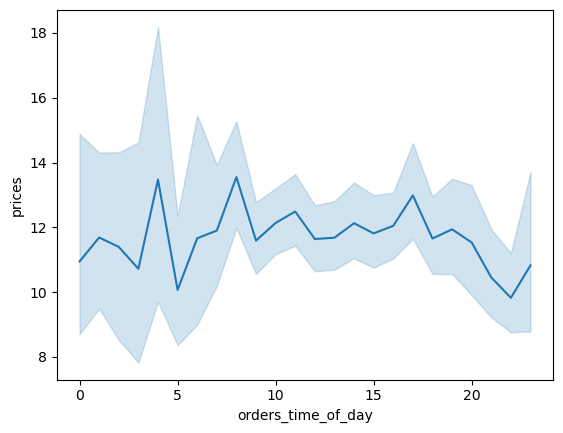

In [25]:
line = sns.lineplot(data = Instacart_2, x = 'orders_time_of_day', y = 'prices')

# Creating a line chart exploring the connections between age and number of dependents

In [27]:
Instacart_3 = small[['Age', 'Num_deps']]

In [28]:
Instacart_3.head()

,Age,Num_deps
0,81,1
2,81,1
3,81,1
6,81,1
10,81,1


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


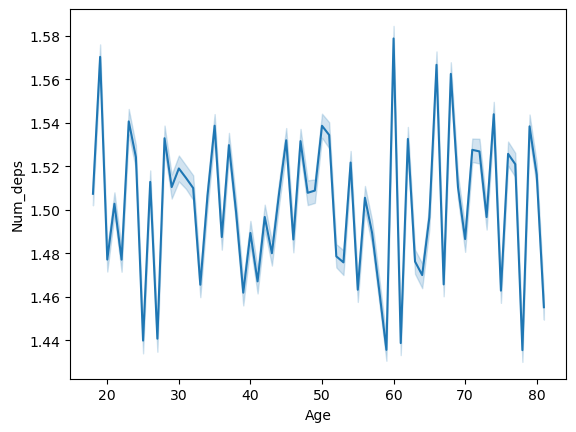

In [29]:
line2 = sns.lineplot(data = Instacart_3, x = 'Age', y = 'Num_deps')

There does not seem to be a connection between the age of a person and the number of dependents they have. Young or old, one could have many or very few dependents.  The line does not move across the chart in a consistent up or down direction.

# Explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot

In [30]:
#use sample data with only specific columns, age and income
Instacart_4 = small[['Age', 'income']]

In [31]:
#Making sure age and income columns show
Instacart_4.head()

,Age,income
0,81,49620
2,81,49620
3,81,49620
6,81,49620
10,81,49620


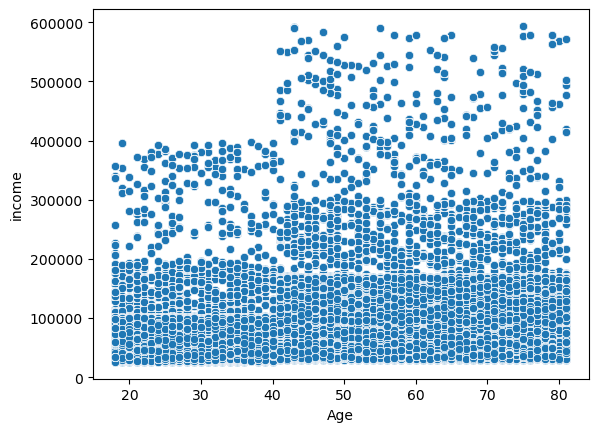

In [32]:
#create scatterplot
scatterplot = sns.scatterplot(x = 'Age', y = 'income', data = Instacart_4)

This scatterplot shows that most people make under two hundred thousand dollars per year. However, when under 40 years of age, the income has a potential of around the four hundrend thousand dollar mark. When over 40 years of age, the income potential is much higher, up to six hundred thousand. 

# Export your visualizations as “.png” files in your relevant project folder.


In [36]:
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_time_of_day.png'))

In [34]:
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [35]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_ords_prices.png'))

In [37]:
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_num_deps.png'))

In [38]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))

In [ ]:
plt.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'histogram_income.png'))